#  <span style="color:#F2EBBBFF">NCAA Men's March Madness </span>
<span style="color:crimson">**2024 Tidytuesday  Week 13** </span>

##  <span style="color:#56B4E9FF">Setup</span>

### <span style="color:#a1c9f4">*Libraries*</span>

In [1]:
import pandas as pd
import numpy as np
import polars as pl 

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import hvplot.polars
import altair as alt
from plotnine import (ggplot, aes, after_stat, stage, geom_col, geom_text, geom_label, coord_flip, labs, theme)

In [3]:
from matplotlib import rcParams
from matplotlib import font_manager

font_dirs =  ['/Library/Fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

rcParams['font.family'] = 'Roboto'
#rcParams['font.size'] = '12'

### <span style="color:#a1c9f4">*Data*</span>

In [5]:
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-03-26/team-results.csv"
dpl = pl.read_csv(url)

## <span style="color:#56B4E9FF">EDA</span>

### <span style="color:#a1c9f4">*Overview*</span>

In [6]:
dpl.shape

(236, 20)

In [6]:
dpl.head()

TEAMID,TEAM,PAKE,PAKERANK,PASE,PASERANK,GAMES,W,L,WINPERCENT,R64,R32,S16,E8,F4,F2,CHAMP,TOP2,F4PERCENT,CHAMPPERCENT
i64,str,f64,i64,f64,i64,i64,i64,i64,f64,i64,i64,i64,i64,i64,i64,i64,i64,str,str
1,"""Abilene Christ…",0.7,45,0.7,52,3,1,2,0.333,2,1,0,0,0,0,0,0,"""0.10%""","""0.00%"""
2,"""Akron""",-0.9,179,-1.1,187,4,0,4,0.0,4,0,0,0,0,0,0,0,"""0.50%""","""0.00%"""
3,"""Alabama""",-2.1,211,-2.9,220,10,5,5,0.5,5,3,2,0,0,0,0,2,"""48.40%""","""15.40%"""
4,"""Albany""",-0.4,147,-0.3,138,3,0,3,0.0,3,0,0,0,0,0,0,0,"""0.00%""","""0.00%"""
6,"""American""",-0.5,160,-0.4,150,3,0,3,0.0,3,0,0,0,0,0,0,0,"""0.20%""","""0.00%"""


In [10]:
dpl.dtypes

[Int64,
 String,
 Float64,
 Int64,
 Float64,
 Int64,
 Int64,
 Int64,
 Int64,
 Float64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 String,
 String]

In [14]:
dpl.columns

['TEAMID',
 'TEAM',
 'PAKE',
 'PAKERANK',
 'PASE',
 'PASERANK',
 'GAMES',
 'W',
 'L',
 'WINPERCENT',
 'R64',
 'R32',
 'S16',
 'E8',
 'F4',
 'F2',
 'CHAMP',
 'TOP2',
 'F4PERCENT',
 'CHAMPPERCENT']

In [16]:
dpl.describe()

describe,TEAMID,TEAM,PAKE,PAKERANK,PASE,PASERANK,GAMES,W,L,WINPERCENT,R64,R32,S16,E8,F4,F2,CHAMP,TOP2,F4PERCENT,CHAMPPERCENT
str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str
"""count""",236.0,"""236""",236.0,236.0,236.0,236.0,236.0,236.0,236.0,236.0,236.0,236.0,236.0,236.0,236.0,236.0,236.0,236.0,"""236""","""236"""
"""null_count""",0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0"""
"""mean""",124.330508,null,-0.009322,114.533898,-0.000424,114.783898,8.008475,4.004237,4.004237,0.263047,4.067797,2.033898,1.016949,0.508475,0.254237,0.127119,0.063559,0.508475,null,null
"""std""",70.660538,null,2.214055,68.464084,2.354742,68.582486,10.264167,7.378807,3.308915,0.261325,3.440012,3.006184,2.056575,1.276603,0.784818,0.514415,0.345467,1.561482,null,null
"""min""",1.0,"""Abilene Christ…",-6.7,1.0,-8.5,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0.00%""","""0.00%"""
"""25%""",64.0,null,-0.8,56.0,-0.9,59.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null
"""50%""",124.0,null,-0.2,118.0,-0.1,119.0,4.0,1.0,3.0,0.25,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null
"""75%""",185.0,null,0.5,175.0,0.5,175.0,9.0,4.0,6.0,0.5,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,null,null
"""max""",245.0,"""Yale""",12.0,236.0,10.6,236.0,53.0,40.0,15.0,0.8,15.0,15.0,9.0,7.0,5.0,4.0,3.0,12.0,"""98.80%""","""9.10%"""


### <span style="color:#a1c9f4">*Counting winners*</span>

In [66]:
winners = (
dpl
 .with_columns(pl.all().name.to_lowercase())  #map_alias(lambda colName: colName.capitalize())
 .select('team', 'champ')
 .filter(pl.col("champ") >  0)
 .with_columns(pl.col('team').str.to_uppercase()) 
 .sort('champ')
 .rename({"team": "name", "champ": "wins"})
)
winners

name,wins
str,i64
"""BAYLOR""",1
"""KENTUCKY""",1
"""LOUISVILLE""",1
"""VIRGINIA""",1
"""DUKE""",2
"""KANSAS""",2
"""NORTH CAROLINA…",2
"""VILLANOVA""",2
"""CONNECTICUT""",3


### <span style="color:#a1c9f4">*Top 20 teams by winning percentage*</span>

In [61]:
percent_df = (dpl
 .with_columns(pl.all().name.to_lowercase())
 .select('team', 'winpercent')
 .with_columns(pl.col('team').str.to_uppercase())
 .rename({"team": "name", "winpercent": "percent"})
 .sort('percent', descending=True)
 .with_columns(pl.col('percent') * 100)
 .head(20)
)

In [62]:
def round_str( col:str, n:int ):
    return ( 
        pl.col( col ).round( n ).cast( str ) + pl.lit( "0"*n ) 
    ).str.replace( rf"^(\d+\.\d{{{n}}}).*$","$1" ).alias( col )

In [64]:
percent_df2 = (
    percent_df
       .with_columns(fmt = round_str( "percent", 1 ) + "%")
       .sort('percent', descending = False)
)

percent_df2.head()

name,percent,fmt
str,f64,str
"""HOUSTON""",66.7,"""66.7%"""
"""LA SALLE""",66.7,"""66.7%"""
"""LOYOLA CHICAGO…",66.7,"""66.7%"""
"""STANFORD""",66.7,"""66.7%"""
"""UCLA""",66.7,"""66.7%"""


## <span style="color:#56B4E9FF">VIZ</span>

### Pandas plot

<Axes: title={'center': "NCAA MEN'S MARCH MADNESS\nTotal Champioship Wins"}>

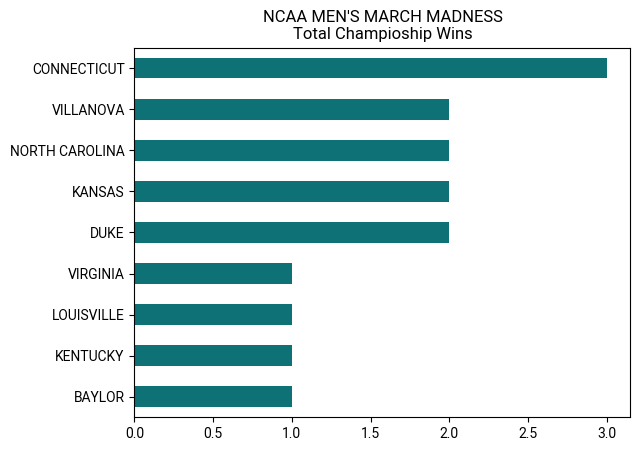

In [67]:
winners.to_pandas(
).sort_values('wins'
).plot.barh(
    x='name', y='wins', 
    title = "NCAA MEN'S MARCH MADNESS\nTotal Champioship Wins",
    legend  = False,
    color = '#0E7175FF',
    ylabel=''
)


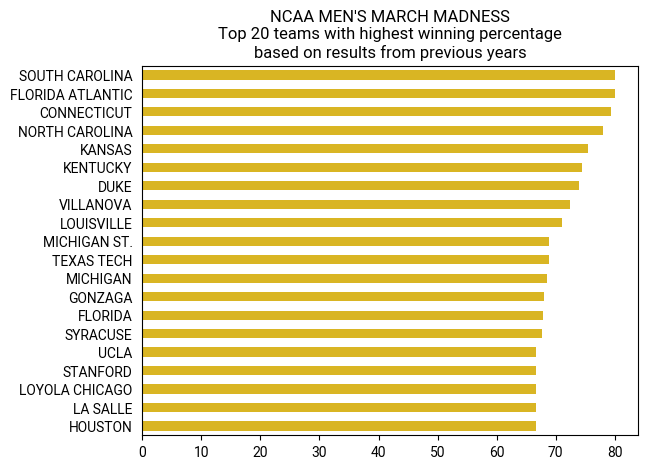

In [68]:
ax = percent_df2.to_pandas(
).sort_values('percent'
).plot.barh(
    x='name', y='percent', 
    title = "NCAA MEN'S MARCH MADNESS\nTop 20 teams with highest winning percentage\nbased on results from previous years",
    legend  = False,
    color = '#D9B523FF',
    ylabel='',
    xticks=None
)
ax.yaxis.set_ticks_position('none') 

### Polars plot + pandas
Polars has a plot method to create interactive plots using hvPlot.

In [69]:
winners.plot.barh(
    x='name', y='wins', 
    title = "NCAA MEN'S MARCH MADNESS\nTotal Champioship Wins",
    legend  = False,
    color = '#0E7175FF',
)

:Bars   [name]   (wins)

In [181]:
percent_df2 .sort('percent', descending=False).plot.barh(width=800, height=500,
    x='name', y='percent', 
    title = "NCAA MEN'S MARCH MADNESS\nTop 20 teams with highest winning percentage based on results from previous years",
    legend  = False,
    color = '#D9B523FF',
    ylabel="",  xlabel="",
)


:Bars   [name]   (percent)

### matplotlib

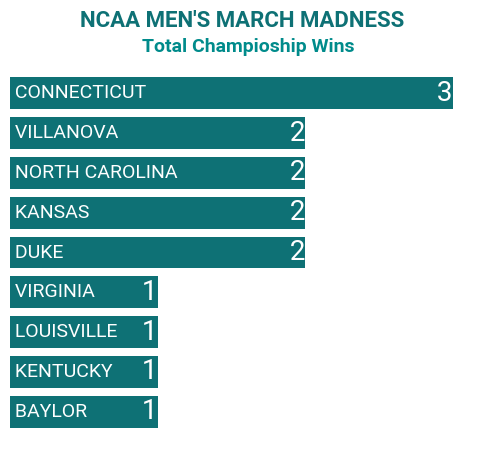

In [70]:
fig, ax = plt.subplots(figsize=(6, 5))
mid = (fig.subplotpars.right + fig.subplotpars.left)/2

ax.axis('off')
ax.barh(winners['name'], winners['wins'], color = '#0E7175FF')

fig.suptitle("NCAA MEN'S MARCH MADNESS", size=16, x=mid, color = '#0E7175FF', weight='bold')
ax.set_title(
    'Total Champioship Wins',
    size=14, x=mid, color = 'darkcyan', weight='bold')

for i, (val, name) in enumerate(zip(winners['wins'], winners['name'])):
    ax.text(x=0, y=i, s=f' {name}',
            ha='left', va='center', fontsize=14, color= 'white')
    ax.text(x=val, y=i, s=f' {int(val)}',
            ha='right', va='center', fontsize=20, color='white'
            )

plt.show()

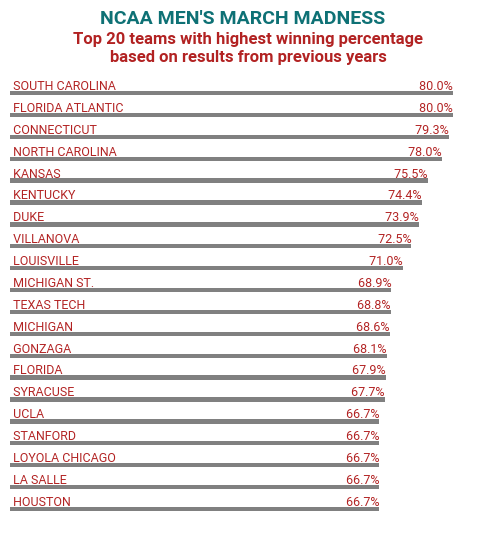

In [71]:
fig, ax = plt.subplots(figsize=(6, 6))
mid = (fig.subplotpars.right + fig.subplotpars.left)/2

ax.axis('off')
ax.barh(
    percent_df2['name'], percent_df2['percent'], 
    color = 'grey',
    height = 0.2)

fig.suptitle("NCAA MEN'S MARCH MADNESS", size=14, x=mid, color = '#0E7175FF', weight='bold')
ax.set_title(
    'Top 20 teams with highest winning percentage\nbased on results from previous years',
    size=12, x=mid, color = 'firebrick', weight='bold')

for i, (val, name) in enumerate(zip(percent_df2['percent'], percent_df2['name'])):
    ax.text(x=0, y=i+.3, s=f' {name}',
            ha='left', va='center', fontsize=9, color= 'firebrick')
    ax.text(x=val-.01, y=i+.3, s=f' {round( val, 2 )}' + "%",
            ha='right', va='center', fontsize=9, color='firebrick'
            )

plt.show()

### Seaborn

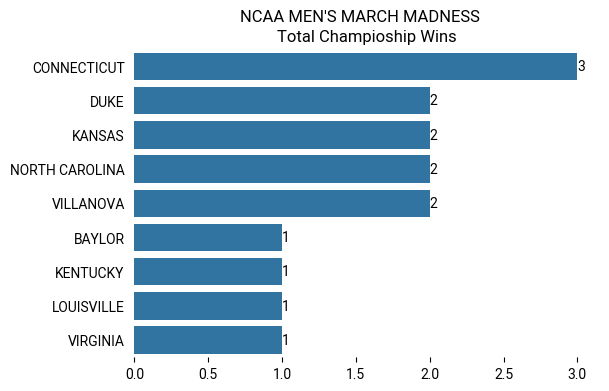

In [72]:
fig, bp = plt.subplots(figsize=(6, 4))
#bp.figure.set_size_inches(6, 4)
bp = sns.barplot(x = 'wins', y = 'name', data = winners.sort('wins', descending=True))

fig.suptitle("NCAA MEN'S MARCH MADNESS")
bp.set_title("Total Champioship Wins")


bp.set_xlabel('')
bp.set_ylabel('')
bp.spines['left'].set_visible(False)
bp.spines['bottom'].set_visible(False)
bp.spines['top'].set_visible(False)
bp.spines['right'].set_visible(False)
# bp.axis('off') remove all frame + labels
bp.tick_params(left=False)

# adding text labels
for i in bp.containers:
    bp.bar_label(i)


plt.show()

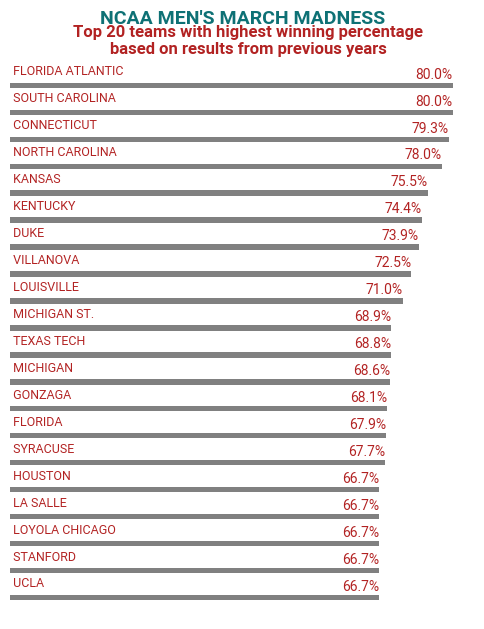

In [74]:
sbdff = percent_df2.sort('percent', descending=True)
fig, ax = plt.subplots(figsize=(6, 7))

ax = sns.barplot(
    x = 'percent', y = 'name', data = sbdff,
    color = 'grey',
    height = 0.2)

ax.set_xlabel('')
ax.set_ylabel('')
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(left=False, bottom=False, labelbottom = False, labelleft = False)

for p in ax.patches:
    width = p.get_width() 
    ax.text(width,       
            p.get_y() - .3, 
            '{:1.1f}'.format(width) + "%",
            ha = 'right',      
            va = 'center',  
            color= 'firebrick'
            )  

for i, (val, name) in enumerate(zip(sbdff['percent'], sbdff['name'])):
    ax.text(x=0, y=i - .8, s=f' {name}',
            ha='left', va='center', fontsize=9, color= 'firebrick')
    
fig.suptitle("NCAA MEN'S MARCH MADNESS\n", size=14, x=mid, color = '#0E7175FF', weight='bold')
ax.set_title(
    'Top 20 teams with highest winning percentage\nbased on results from previous years\n',
    size=12, x=mid, color = 'firebrick', weight='bold')

plt.show()


### Plotly

In [75]:
pldff = percent_df.sort('percent')
fig = px.bar(
    pldff, width=600, height=700,
    x="percent", y="name",
    labels={'percent':'Percent wins (%)'}, 
    text_auto=True,  #text="name"
    title="NCAA MEN'S MARCH MADNESS")

fig.update_traces(marker_color = 'lightslategrey', width= 1)
fig.update_layout(
    font_family="roboto", #font_color="#0E7175FF",
    title_font_family="roboto", title_font_color="darkgreen",
)

fig.update_yaxes(
    title_text='', showline=False,  
    #linewidth=0.25,  linecolor='#071633'
    )



In [201]:
#pldff = percent_df2.sort('percent')
#pldff['fmt'].to_list()

In [76]:
import plotly.graph_objects as go
pldff = percent_df2.sort('percent')

x = pldff['name'].to_list()
y = pldff['name'].to_list()
p = pldff['fmt'].to_list()

fig = go.Figure( 
        go.Bar(
            x=[1]* len(x),
            y=x,
            text=p,
            textposition="inside",
            textfont=dict(color="white"),
            orientation="h",
            marker_color="grey",
        )
)

fig.add_trace(
    go.Bar(
        x=y,
        y=x,
        orientation="h",
        marker_color="red",
    )
)
fig.update_layout(title='Top Authors', barmode="overlay", showlegend=False, template="presentation", width=600, height=700)
fig.update_yaxes(
    tickmode="array",
    categoryorder="total ascending",
    tickvals=x,
    ticktext=x,
    ticklabelposition="inside",
    tickfont=dict(color="white"),
)
fig.update_xaxes(range=[0, 1], visible=False)


fig.show()

In [102]:
fig = (
    go.Figure()
        .add_bar( 
            x=[100] *  pldff['name'].len(), y= pldff['name'], marker_color = '#ededed', 
              orientation='h' ,  width=.8,  text=pldff['fmt'], 
              textfont=dict(color="#ff8c00", family = 'Avenir Bold', size = 30),
              marker_line_width = 0,)
        .add_bar(
            x=pldff['percent'], y= pldff['name'], orientation='h' ,  width=.8,  marker_color ='#ff8c00',
            text=pldff['name'], textposition="inside", insidetextanchor="start", 
            textfont=dict(color="white", family = 'Avenir Bold', size = 20),)
        .update_layout(barmode="overlay")
)
#fig.update_traces(marker_line_color = 'black', marker_line_width = 2, opacity = 1)
fig.update_layout(
    height=750, width   = 600, paper_bgcolor= 'white', plot_bgcolor='white',  showlegend=False,
    )

fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)

fig.update_layout(
     title="<b>NCAA MEN'S MARCH MADNESS</b><br><sup>Top 20 teams with highest winning percentage\nbased on results from previous years</sup>",
    font_family="roboto", #font_color="#0E7175FF",
    title_font_family="Gravitas One", 
    title_font_color="#b37800",
)


fig.show()

In [100]:
pldff['percent'].max()
pldff['name'].len()

20

### Altair

In [103]:
adf = percent_df2.sort('percent').with_columns((pl.col("percent") / 100).alias('pct'))
adf.head(2)

name,percent,fmt,pct
str,f64,str,f64
"""HOUSTON""",66.7,"""66.7%""",0.667
"""LA SALLE""",66.7,"""66.7%""",0.667


In [104]:
alt.Chart(adf).mark_bar(color='grey').encode(
    alt.X('percent').title('Percent wins'),
    alt.Y('name').title('TEAMS').sort('-x')
)

alt.Chart(...)

In [146]:
alt.Chart(adf, title = "NCAA MEN'S MARCH MADNESS").mark_bar().encode(
    alt.X('percent:Q'),
    alt.Y(
        'name:N', 
        sort = '-x',
        )
).configure_mark(
    opacity=0.6,
    color='firebrick',
).configure_view(
    strokeWidth=0
    ).configure_axis(
        grid=False, 
        domain=False
        )

alt.Chart(...)

In [172]:
source = adf

base = alt.Chart(source).encode(
    alt.X(
        'pct:Q', 
        axis=alt.Axis(
            format='.0%',
            tickSize=0,
            labels=False,
            grid=False),
        title='',
        scale=alt.Scale(domain=[0, .85])
        ),
    alt.Y(
        'name:N', 
        sort = '-x',
        axis=alt.Axis(tickSize=0),
        title=''
    ),
    text='fmt',
).properties(
    title={
      "text": ["NCAA MEN'S MARCH MADNESS"], 
      "subtitle": ["Top 20 teams with highest winning percentage", "based on results from previous years"],
      "color": "darkorange",
      "subtitleColor": "grey"
    },
    width=600, height=400
)



base.mark_bar(color = '#F0A658') + base.mark_text(align='left', dx=-40, color = 'white', size = 14) 

alt.LayerChart(...)

### Plotnine

**Basic plot**

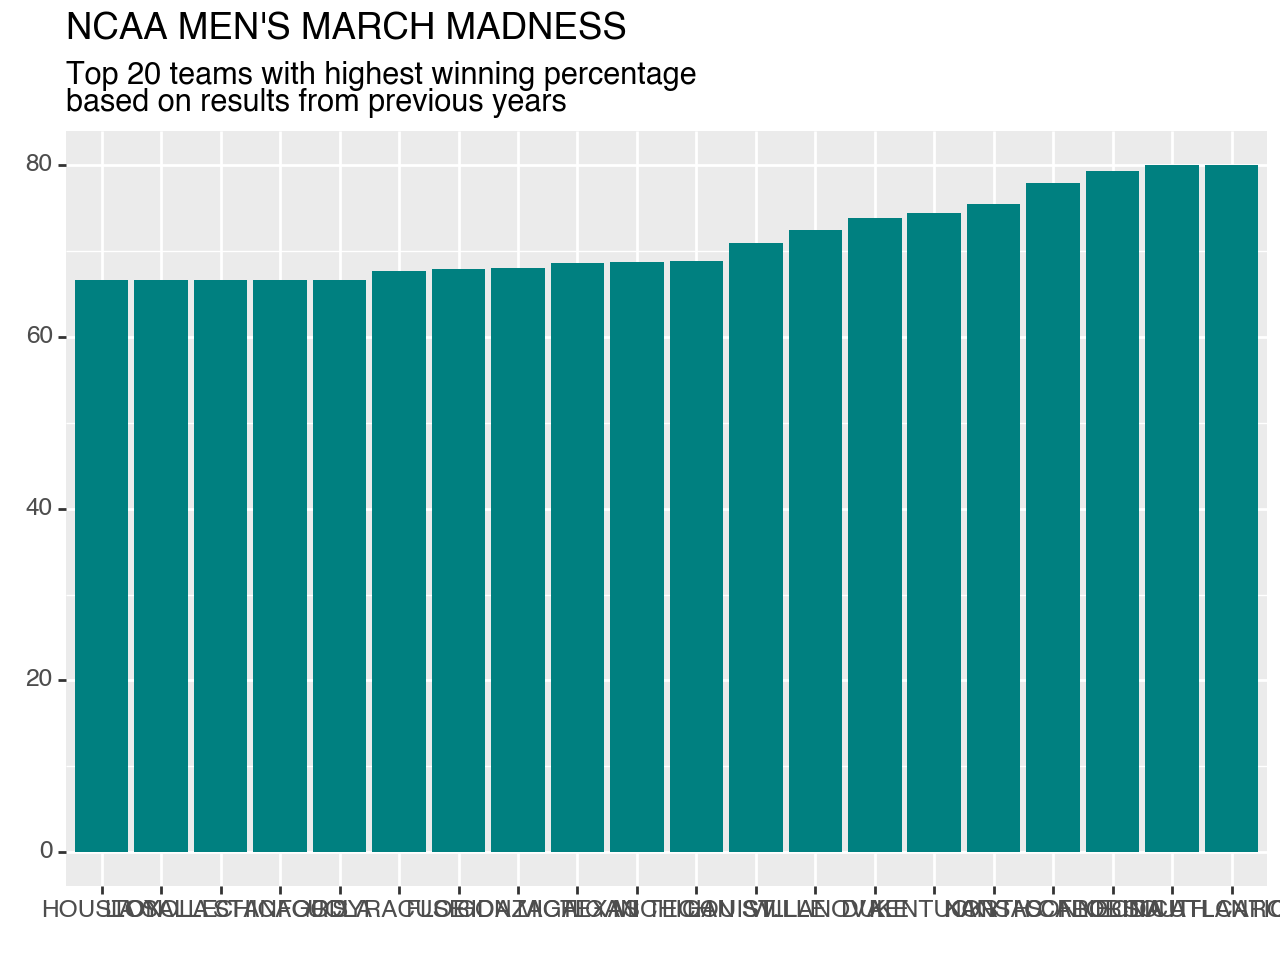

<Figure Size: (640 x 480)>

In [314]:
pdf = percent_df2.sort('percent').to_pandas()

pdf = pdf.assign(name_ordered=pd.Categorical(pdf["name"], categories=pdf["name"].to_list()))

p9 = (
    ggplot(pdf)
    + aes(x="name_ordered",  y = 'percent')
    + geom_col(fill = 'teal')
    + labs(
        x = "", y = "",
        title = "NCAA MEN'S MARCH MADNESS", 
        subtitle = "Top 20 teams with highest winning percentage\nbased on results from previous years")
)

p9

In [308]:
from plotnine import theme_light, theme_538, theme_classic, theme, position_dodge, scale_y_continuous
from plotnine import element_text,   element_blank, element_rect, element_line

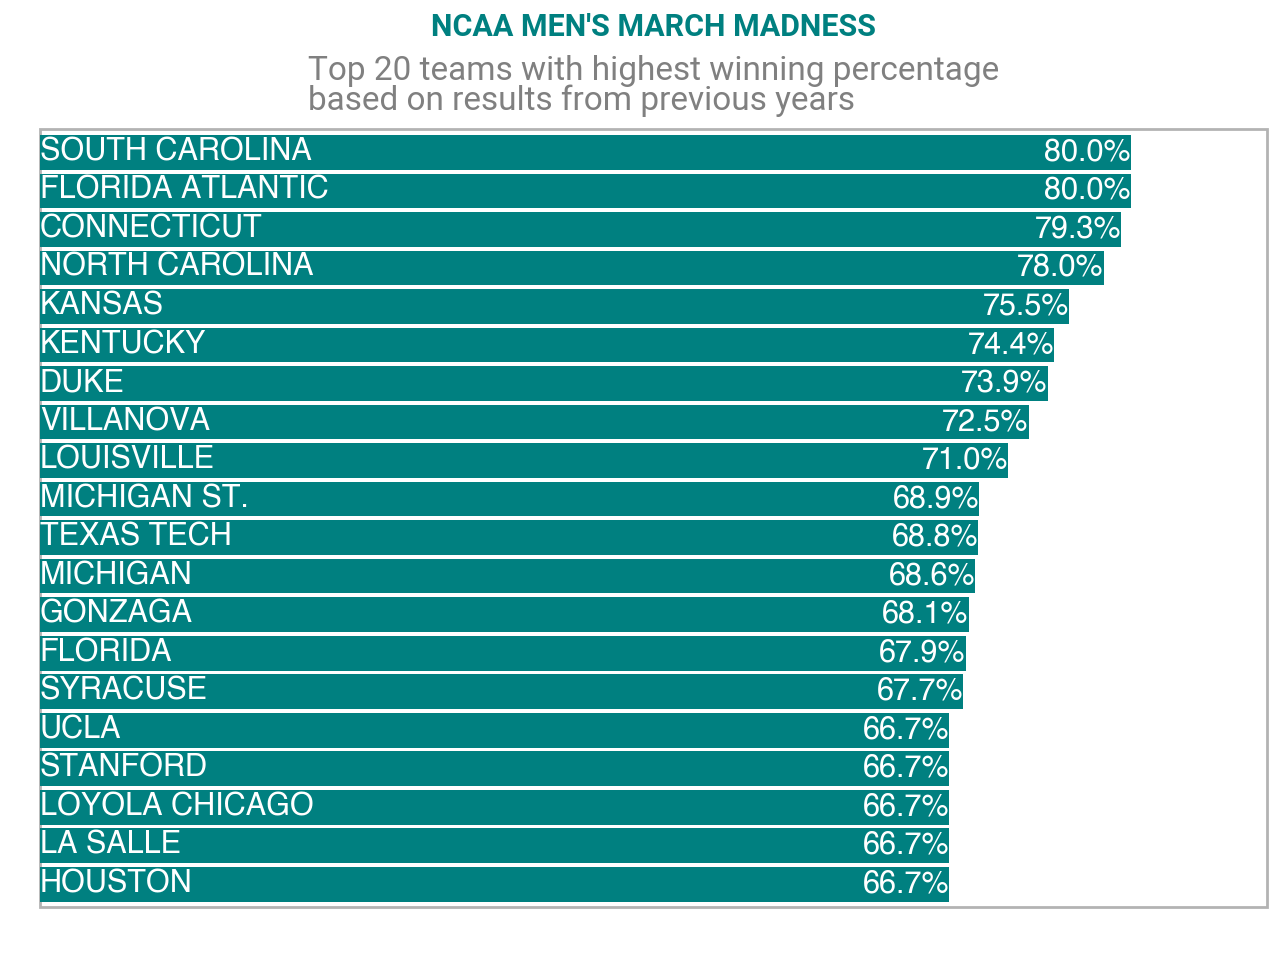

<Figure Size: (640 x 480)>

In [310]:
(p9  
  + geom_text(aes(label = "fmt"), color = "white", ha="right")
  + geom_text(aes(label = "name", y = 0), color = "white", ha="left")
  +  scale_y_continuous(expand = [0, 0], limits = [0, 90])
  + coord_flip() 
  + theme_light()
  + theme(
      axis_line= element_blank(),
      axis_text = element_blank(),
      axis_ticks = element_blank(),
      panel_grid= element_blank(),
      plot_title= element_text(color = 'teal', face = 'bold', font =  'roboto', size = 20, hjust = .5),
      plot_subtitle= element_text(color = 'grey',  font =  'roboto', size = 12, hjust = .5),
  )
   
)